# Week 6: Homework 2    -    Javier Garcia Ordonez - 100345713

----------------------------------------------------
Machine Learning                      

Year 2019/2020

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es* 

----------------------------------------------------

# 1. Introduction to ensembles

The goal of ensemble learning is to combine a set of base learners to build an improved prediction model. The key idea  behind ensembles lies in exploiting the diversity among the base learners; the way of generating this diversity let us classify these methods into two main types:

* **Bagging**: the diversity  among classifiers is generated using different partitions of the training data.
* **Boosting**: it sequentially train a set of weak classifiers using modified versions of the data.

We have already seen a kind of these methods: *Random Forests (RF)*. Remember that RF train a set of trees, each tree use a different subset of samples and features, and later combine their outputs. So, we can say that RF is a Bagging method. 


# 2. Bagging: Boostrap Aggregating

A bagging ensemble combines a set of classiffiers where each base learner is trained with a bagged subset of the training samples. This bagging subsampling consist in randomly, and with replacement,  choosing multiple random samples from the original training data. 

Once the set of base learners is trained, the final ensemble output is obtained by averaging all learner's outputs. In the classification case, usually a majority vote is applied.

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Ensembles/Bagging.png" width="48%" > 


(*) Figure from https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de


**References**

L. Breiman, “Bagging predictors”, Machine Learning, 24(2), 123-140, 1996.




# 3. Boosting: Real Adaboost

Boosting methods train a sequence of weak classifiers with weighted or emphasized versions of the training data. Each one of these classifiers is weak since its error rate can be only slightly better than random guessing. Finally, to obtain the final ensemble output, the predictions from all of them are then combined through a weighted combination of all learners' outputs.


The most popular boosting algorithm is called **AdaBoost** (Adaptive Boosting). This boosting method trains this sequence of weak classifiers in such way that each new classifier pay more attention to samples missclassified by the previous learners. Versions of this algorithm are:
* AdaBoost.M1 or  “Discrete AdaBoost” where base learners outputs are discrete estimations of the output class.
* “Real AdaBoost”, in this case, base classifier return a real-valued prediction (e.g., a probability mapped to the interval [−1,1]).

Let's now go deeper in the working principles of the **Real AdaBoost** algorithm.

**References**

* Schapire, R.E. The strength of weak learnability. Machine Learning, 5(2): 1651-1686, 1990.

* Freund, Y. and Schapire, R.E. Experiments with a new boosting algorithm. Proc. of the 13th International Conference on Machine Learning. pp. 148-156, 1996.


## Real Adaboost
Consider we have a binary classification problem given by training dataset $S$ consisting  of $N$ pairs $(\mathbf{x}^{(i)},y^{(i)})$, where $\mathbf{x}^{(i)}\in\mathbb{R}^L$ is the $i$-th observation and $y^{(i)}\in\{-1,1\}$  is its associated label.

Real Adaboost (RA) sequentially trains a set of $T$ learners where each learner implements a prediction function $o_t(x) \in [-1,1]$. To learn this prediction function each learner observes the overall training dataset $S$, but an emphasis function $D_t(\mathbf{x})$ is used during its training to make the learner pay more attention to most erroneous samples.
Finally, the ensemble output is obtained as an averaged weighted sum of all learner output:

$$ f_T({\bf x}) = \displaystyle \sum_{t=1}^T \alpha_t o_t({\bf x})$$

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Ensembles/boosting.jpg" width="30%" > 



* **Emphasis function**:
To force diversity among the base learners, by means of an emphasis function RA applies weights  to each of the training observations. Initially all weights are equal:
$$ D_{1}({\bf x}^{(i)}) = \frac{1}{N}   $$

  so that the first learner is trained in the usual manner. For next iterations,  $t = 2,3,\ldots,T$, the emphasis function updated with the following rule:

$$ D_{t+1}({\bf x}^{(i)}) = \frac{D_{t}({\bf x}^{(i)}) \exp \left( - \alpha_t o_t({\bf x}^{(i)}) {y}^{(i)} \right)}{Z_t}   $$

*--> if o(x) is high and same sign than y, then we have exp(-large number)-->tends to zero. But if the sign of o(x) and y (predicted and true labels) are different (error), then we have a positive exponential --> D(t+1) increases*

  where $Z_t$ is a normalization constant making $\sum_{i=1}^N D_{t+1}({\bf x}^{(i)})  = 1$. Note that this update rule increase the emphasis weight for those observations that were misclassified by the previous classifiers, whereas the weights are decreased for those that were  correctly classified. Thus, as new learners are added to the ensemble, most erroneous samples will receive an increased attention.

* **Output weights ($\alpha_t$)**

To obtain the output weights, RA minimizes the exponential loss function:
$${\bf \alpha}^* =\displaystyle \underset{{\bf \alpha}}{\operatorname{min}} \sum_{i=1}^N \exp \left( - \sum_{t=1}^T \alpha_t o_t({\bf x}^{(i)}) {y}^{(i)} \right) = \displaystyle \underset{{\bf \alpha}}{\operatorname{min}} \sum_{i=1}^N \exp \left( - f_T({\bf x}^{(i)}) {y}^{(i)} \right)$$

which solution can be analytically computed as

$$\alpha_t = \frac{1}{2} \ln \left( \frac{1+\gamma_t}{1-\gamma_t}\right)$$

where $\gamma_t = \sum_{i=1}^N   D_{t}({\bf x}^{(i)}) o_t({\bf x}^{(i)}) {y}^{(i)} $. The effect of these weights is to give higher influence to the more accurate classifiers in the ensemble. 


**Exponential loss**

This cost function, quite similar to the binomial deviance, is un upper bound of the classification error.


In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

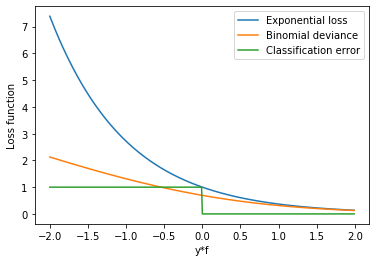

In [9]:
# Plot the exponential loss function (un upper bound of the classfication error)
f = np.arange(-2,2,0.01)
y = 1

l_alpha = np.exp(-y*f)
plt.figure()
plt.plot(y*f,l_alpha, label='Exponential loss')


# Compare with binomial deviance
l_w = np.log(1+ np.exp(f))-y*f
plt.plot(y*f,l_w, label='Binomial deviance')

# Classification error
e_class = np.zeros(f.shape)
e_class[y*f<0] =1
plt.plot(y*f,e_class, label='Classification error')

plt.legend()
plt.xlabel('y*f')
plt.ylabel('Loss function')

plt.show()

# 4. Let's work

The aim of this second HW is to implement and analyse the performance of these enseble methods. To do this, we will work with the Breast Cancer database (described in the next section) and you will have to complete the following exercises.

### Exercise 1. Load and prepare the data

For this lab session, let's work over the  [Breast cancer data set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) a binary classification problem aimed to detect breast cancer from a  digitized image of breast mass. For this prupose, the images have been preprocesed and characterized with 30 input features describing the mass.

Complete next cell code, so that you can:
* Load the dataset
* Create training and testing partitions with the 60% and 40% of the original data
* Normalize the data to zero mean and unitary standard deviation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [2]:
# <SOL>
from sklearn.datasets import load_breast_cancer
fulldata = load_breast_cancer()
X = fulldata['data']
Y = fulldata['target']
feature_names = fulldata['feature_names']

from sklearn.model_selection import train_test_split
import random
random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=25)

# Data normalization
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_train)  # fit() learns mean and std parameters
X_train = transformer.transform(X_train) # transform() normalizes
X_test =  transformer.transform(X_test)
# </SOL>

*The breast cancer dataset has 569 data samples with 30 features each. Labels are binary (0 is malignant, 1 is benign).*

## Exercise 2. Bagging methods


### Exercise 2.1
Complete the following code to desing a function able to train and test a bagged ensemble of $T$ decision trees where each tree have to use a subset of *nperc* of the total number of training samples. Adjust the decision tree parameters so that the maximum depth is fixed to 2 (weak learner).


In [19]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.utils import resample


def BaggEnsemble(X_train, Y_train, X_test, Y_test, T, nperc, only_need_last = False):
  '''
  Train and evaluate a bagged ensemble of decission trees

    Args:
        X_train(numpy dnarray): training (number training data x number dimensions). 
        Y_train (numpy dnarray): labels of the training data (number training data x 1).
        X_test(numpy dnarray): test data to evaluate the ensemble performance (number test data x number dimensions).
        Y_test (numpy dnarray): labels of the test data (number test data x 1).
        T: number of learners in the ensemble  
        nperc: subsampling rate for the bagging process. Value from 0 (none sample is used) to 1 (all samples are used)                                       
   Returns:
        acc_tree_train (numpy dnarray): accuracy over the training data for different number of learners. 
                It's a vector length T, where the t-th element is the ensemble accuracy when only t trees are used.
        acc_tree_test (numpy dnarray): accuracy over the test data for different number of learners. 
                It's a vector length T, where the t-th element is the ensemble accuracy when only t trees are used.
        Y_pred_train (numpy dnarray): predicted outputs over the training data. It's a matrix of dimensions T x number of training samples, 
          where the t-th row has the predicted outputs when t trees are used.
        Y_pred_test (numpy dnarray): predicted outputs over the test data. It's a matrix of dimensions T x number of test samples, 
          where the t-th row has the predicted outputs when t trees are used.

  '''
  
  # </SOL>
  nsamples = int(nperc*X.shape[0])  # Number of samples to select in each iteration
  acc_tree_train = np.zeros((T,))
  acc_tree_test = np.zeros((T,))
  Y_pred_train = np.zeros((T,Y_train.shape[0]))
  Y_pred_test  = np.zeros((T,Y_test.shape[0]))

  running_train = np.zeros((T,))
  running_test  = np.zeros((T,))
  outputs_train = np.zeros((T,Y_train.shape[0]))
  outputs_test  = np.zeros((T,Y_test.shape[0]))
  pred_train = np.zeros((T,Y_train.shape[0]))
  pred_test  = np.zeros((T,Y_test.shape[0]))

  for t in range(T):
    X_sel, Y_sel = resample(X_train,Y_train,replace=True,n_samples=nsamples)
    mytree = tree.DecisionTreeClassifier(max_depth=2)
    mytree.fit(X_sel,Y_sel)

    # Get soft outputs
    outputs_train[t,:] = np.dot(mytree.predict_proba(X_train),mytree.classes_)
    outputs_test[t,:]  = np.dot(mytree.predict_proba(X_test) ,mytree.classes_)

    # Get binary results
    aux = copy.deepcopy(outputs_train[t,:])
    aux[aux>=0] = 1
    aux[aux <0] = -1
    pred_train[t,:] = aux

    aux = copy.deepcopy(outputs_test[t,:])
    aux[aux>=0] = 1
    aux[aux <0] = -1
    pred_test[t,:] = aux

    # Get accuracy of each tree
    running_train[t] = mytree.score(X_train,Y_train)
    running_test[t]  = mytree.score(X_test,Y_test)

  if only_need_last==False:
    for i in range(T):
#       acc_tree_train[i] = np.mean(running_train[:(i+1)] )
#       acc_tree_test[i]  = np.mean(running_test[:(i+1)] )
      Y_pred_train[i,:] = stats.mode(pred_train[:(i+1),:],axis=0)[0][0]
      Y_pred_test[i,:]  = stats.mode(pred_test[:(i+1),:],axis=0)[0][0]  
      acc_tree_train[i] = accuracy_score(Y_train,Y_pred_train[i,:])
      acc_tree_test[i]  = accuracy_score(Y_test,Y_pred_test[i,:])
      print(i,acc_tree_test[i])
  else:
    acc_tree_train[-1] = np.mean(running_train)
    acc_tree_test[-1]  = np.mean(running_test)
    Y_pred_train[-1,:] = stats.mode(pred_train,axis=0)[0][0]
    Y_pred_test[-1,:]  = stats.mode(pred_test,axis=0)[0][0]      

  # </SOL>
  return acc_tree_train, acc_tree_test, Y_pred_train, Y_pred_test, outputs_train, outputs_test

### Exercise 2.2

Train an ensemble of 40 trees with a subsamplig rate of 50% (T=40 and nperc = 0.5).

0 0.9210526315789473
1 0.9035087719298246
2 0.9166666666666666
3 0.9035087719298246
4 0.9166666666666666
5 0.9166666666666666
6 0.9210526315789473
7 0.9210526315789473
8 0.9254385964912281
9 0.9210526315789473
10 0.9254385964912281
11 0.9210526315789473
12 0.9210526315789473
13 0.9166666666666666
14 0.9210526315789473
15 0.9166666666666666
16 0.9166666666666666
17 0.9122807017543859
18 0.9210526315789473
19 0.9078947368421053
20 0.9078947368421053
21 0.9078947368421053
22 0.9122807017543859
23 0.9078947368421053
24 0.9166666666666666
25 0.9078947368421053
26 0.9166666666666666
27 0.9122807017543859
28 0.9210526315789473
29 0.9210526315789473
30 0.9210526315789473
31 0.9166666666666666
32 0.9254385964912281
33 0.9210526315789473
34 0.9254385964912281
35 0.9210526315789473
36 0.9210526315789473
37 0.9254385964912281
38 0.9254385964912281
39 0.9210526315789473
Execution time is 0.9686861038208008


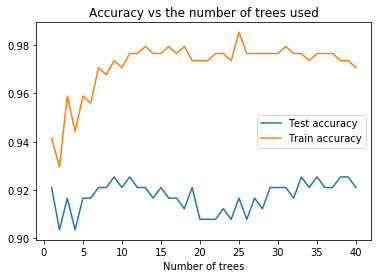

In [20]:
# <SOL>
import time

t = time.time()
acc_tree_train, acc_tree_test, Y_pred_train, Y_pred_test, outputs_train, outputs_test = BaggEnsemble(X_train, Y_train, X_test, Y_test, T=40, nperc=0.5)
print('Execution time is', time.time()-t)

plt.figure()
x = np.arange(len(acc_tree_train))+1
plt.plot(x,acc_tree_test,label='Test accuracy')
plt.plot(x,acc_tree_train,label='Train accuracy')
plt.legend()
plt.title('Accuracy vs the number of trees used')
plt.xlabel('Number of trees')
plt.show()
# </SOL>

*As the number of trees increases, the variability decreases and the accuracy seems to reach a plateau both for train and test accuracy. Also, the training accuracy slightly improves, and the test accuracy does increase more, as including more trees trained with a larger variety of data improves the generalization capabilities of the ensemble.*

In [9]:
t = time.time()
acc_tree_train, acc_tree_test, Y_pred_train, Y_pred_test, outputs_train, outputs_test = BaggEnsemble(X_train, Y_train, X_test, Y_test, T=40, nperc=0.5, only_need_last=True)
print('Execution time is', time.time()-t)

Execution time is 0.15621423721313477


*By only retrieving the results for using all trees, we save a lot of computation. This will be used for the last section, computing Bias and variance, where we have to train many times over the Bagging method, and this speedup will result in a significant decrease of execution time.*

 ### Scikit Baggings method

In [10]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(tree.DecisionTreeClassifier(max_depth=2), n_estimators = 40, max_samples = 0.5) 
bagging.fit(X_train,Y_train)

train_acc = bagging.score(X_train,Y_train)
test_acc  = bagging.score(X_test,Y_test)
print('Train accuracy is %.4f and test accuracy is %.4f' %(train_acc,test_acc))

Train accuracy is 0.9707 and test accuracy is 0.9211


*The results very similar to those obtained with our bagging method.*

### Exercise 2.3

Analyze the **diversity** among the base learner' outputs for different *nperc* rates. You can analyze this diversity by measuring the correlation among the learner's soft-outputs. Firstly, obtain the matrix with all pairwaise correlation values (over the training learners' outputs) and, then, compute the ensemble diversity as one minus the averaged value of all pairwise correlation values. Finally, analyze the results.

Some useful functions: [np.corrcoef](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html)

Note: You can find other ensemble diversity measurements in https://lucykuncheva.co.uk/papers/lkml.pdf

0 0.6274165202108963
1 0.6274165202108963
2 0.6274165202108963
3 0.6274165202108963
4 0.6274165202108963
5 0.6274165202108963
6 0.6274165202108963
7 0.6274165202108963
8 0.6274165202108963
9 0.6274165202108963
10 0.6274165202108963
11 0.6274165202108963
12 0.6274165202108963
13 0.6274165202108963
14 0.6274165202108963
15 0.6274165202108963
16 0.6274165202108963
17 0.6274165202108963
18 0.6274165202108963
19 0.6274165202108963
20 0.6274165202108963
21 0.6274165202108963
22 0.6274165202108963
23 0.6274165202108963
24 0.6274165202108963
25 0.6274165202108963
26 0.6274165202108963
27 0.6274165202108963
28 0.6274165202108963
29 0.6274165202108963
30 0.6274165202108963
31 0.6274165202108963
32 0.6274165202108963
33 0.6274165202108963
34 0.6274165202108963
35 0.6274165202108963
36 0.6274165202108963
37 0.6274165202108963
38 0.6274165202108963
39 0.6274165202108963


C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


0 0.6274165202108963
1 0.6274165202108963
2 0.6274165202108963
3 0.6274165202108963
4 0.6274165202108963
5 0.6274165202108963
6 0.6274165202108963
7 0.6274165202108963
8 0.6274165202108963
9 0.6274165202108963
10 0.6274165202108963
11 0.6274165202108963
12 0.6274165202108963
13 0.6274165202108963
14 0.6274165202108963
15 0.6274165202108963
16 0.6274165202108963
17 0.6274165202108963
18 0.6274165202108963
19 0.6274165202108963
20 0.6274165202108963
21 0.6274165202108963
22 0.6274165202108963
23 0.6274165202108963
24 0.6274165202108963
25 0.6274165202108963
26 0.6274165202108963
27 0.6274165202108963
28 0.6274165202108963
29 0.6274165202108963
30 0.6274165202108963
31 0.6274165202108963
32 0.6274165202108963
33 0.6274165202108963
34 0.6274165202108963
35 0.6274165202108963
36 0.6274165202108963
37 0.6274165202108963
38 0.6274165202108963
39 0.6274165202108963


C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


0 0.6274165202108963
1 0.6274165202108963
2 0.6274165202108963
3 0.6274165202108963
4 0.6274165202108963
5 0.6274165202108963
6 0.6274165202108963
7 0.6274165202108963
8 0.6274165202108963
9 0.6274165202108963
10 0.6274165202108963
11 0.6274165202108963
12 0.6274165202108963
13 0.6274165202108963
14 0.6274165202108963
15 0.6274165202108963
16 0.6274165202108963
17 0.6274165202108963
18 0.6274165202108963
19 0.6274165202108963
20 0.6274165202108963
21 0.6274165202108963
22 0.6274165202108963
23 0.6274165202108963
24 0.6274165202108963
25 0.6274165202108963
26 0.6274165202108963
27 0.6274165202108963
28 0.6274165202108963
29 0.6274165202108963
30 0.6274165202108963
31 0.6274165202108963
32 0.6274165202108963
33 0.6274165202108963
34 0.6274165202108963
35 0.6274165202108963
36 0.6274165202108963
37 0.6274165202108963
38 0.6274165202108963
39 0.6274165202108963


C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


0 0.6274165202108963
1 0.6274165202108963
2 0.6274165202108963
3 0.6274165202108963
4 0.6274165202108963
5 0.6274165202108963
6 0.6274165202108963
7 0.6274165202108963
8 0.6274165202108963
9 0.6274165202108963
10 0.6274165202108963
11 0.6274165202108963
12 0.6274165202108963
13 0.6274165202108963
14 0.6274165202108963
15 0.6274165202108963
16 0.6274165202108963
17 0.6274165202108963
18 0.6274165202108963
19 0.6274165202108963
20 0.6274165202108963
21 0.6274165202108963
22 0.6274165202108963
23 0.6274165202108963
24 0.6274165202108963
25 0.6274165202108963
26 0.6274165202108963
27 0.6274165202108963
28 0.6274165202108963
29 0.6274165202108963
30 0.6274165202108963
31 0.6274165202108963
32 0.6274165202108963
33 0.6274165202108963
34 0.6274165202108963
35 0.6274165202108963
36 0.6274165202108963
37 0.6274165202108963
38 0.6274165202108963
39 0.6274165202108963


C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


0 0.6274165202108963
1 0.6274165202108963
2 0.6274165202108963
3 0.6274165202108963
4 0.6274165202108963
5 0.6274165202108963
6 0.6274165202108963
7 0.6274165202108963
8 0.6274165202108963
9 0.6274165202108963
10 0.6274165202108963
11 0.6274165202108963
12 0.6274165202108963
13 0.6274165202108963
14 0.6274165202108963
15 0.6274165202108963
16 0.6274165202108963
17 0.6274165202108963
18 0.6274165202108963
19 0.6274165202108963
20 0.6274165202108963
21 0.6274165202108963
22 0.6274165202108963
23 0.6274165202108963
24 0.6274165202108963
25 0.6274165202108963
26 0.6274165202108963
27 0.6274165202108963
28 0.6274165202108963
29 0.6274165202108963
30 0.6274165202108963
31 0.6274165202108963
32 0.6274165202108963
33 0.6274165202108963
34 0.6274165202108963
35 0.6274165202108963
36 0.6274165202108963
37 0.6274165202108963
38 0.6274165202108963
39 0.6274165202108963


C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


0 0.6274165202108963
1 0.6274165202108963
2 0.6274165202108963
3 0.6274165202108963
4 0.6274165202108963
5 0.6274165202108963
6 0.6274165202108963
7 0.6274165202108963
8 0.6274165202108963
9 0.6274165202108963
10 0.6274165202108963
11 0.6274165202108963
12 0.6274165202108963
13 0.6274165202108963
14 0.6274165202108963
15 0.6274165202108963
16 0.6274165202108963
17 0.6274165202108963
18 0.6274165202108963
19 0.6274165202108963
20 0.6274165202108963
21 0.6274165202108963
22 0.6274165202108963
23 0.6274165202108963
24 0.6274165202108963
25 0.6274165202108963
26 0.6274165202108963
27 0.6274165202108963
28 0.6274165202108963
29 0.6274165202108963
30 0.6274165202108963
31 0.6274165202108963
32 0.6274165202108963
33 0.6274165202108963
34 0.6274165202108963
35 0.6274165202108963
36 0.6274165202108963
37 0.6274165202108963
38 0.6274165202108963
39 0.6274165202108963


C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


0 0.6274165202108963
1 0.6274165202108963
2 0.6274165202108963
3 0.6274165202108963
4 0.6274165202108963
5 0.6274165202108963
6 0.6274165202108963
7 0.6274165202108963
8 0.6274165202108963
9 0.6274165202108963
10 0.6274165202108963
11 0.6274165202108963
12 0.6274165202108963
13 0.6274165202108963
14 0.6274165202108963
15 0.6274165202108963
16 0.6274165202108963
17 0.6274165202108963
18 0.6274165202108963
19 0.6274165202108963
20 0.6274165202108963
21 0.6274165202108963
22 0.6274165202108963
23 0.6274165202108963
24 0.6274165202108963
25 0.6274165202108963
26 0.6274165202108963
27 0.6274165202108963
28 0.6274165202108963
29 0.6274165202108963
30 0.6274165202108963
31 0.6274165202108963
32 0.6274165202108963
33 0.6274165202108963
34 0.6274165202108963
35 0.6274165202108963
36 0.6274165202108963
37 0.6274165202108963
38 0.6274165202108963
39 0.6274165202108963


C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


0 0.6274165202108963
1 0.6274165202108963
2 0.6274165202108963
3 0.6274165202108963
4 0.6274165202108963
5 0.6274165202108963
6 0.6274165202108963
7 0.6274165202108963
8 0.6274165202108963
9 0.6274165202108963
10 0.6274165202108963
11 0.6274165202108963
12 0.6274165202108963
13 0.6274165202108963
14 0.6274165202108963
15 0.6274165202108963
16 0.6274165202108963
17 0.6274165202108963
18 0.6274165202108963
19 0.6274165202108963
20 0.6274165202108963
21 0.6274165202108963
22 0.6274165202108963
23 0.6274165202108963
24 0.6274165202108963
25 0.6274165202108963
26 0.6274165202108963
27 0.6274165202108963
28 0.6274165202108963
29 0.6274165202108963
30 0.6274165202108963
31 0.6274165202108963
32 0.6274165202108963
33 0.6274165202108963
34 0.6274165202108963
35 0.6274165202108963
36 0.6274165202108963
37 0.6274165202108963
38 0.6274165202108963
39 0.6274165202108963


C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


0 0.6274165202108963
1 0.6274165202108963
2 0.6274165202108963
3 0.6274165202108963
4 0.6274165202108963
5 0.6274165202108963
6 0.6274165202108963
7 0.6274165202108963
8 0.6274165202108963
9 0.6274165202108963
10 0.6274165202108963
11 0.6274165202108963
12 0.6274165202108963
13 0.6274165202108963
14 0.6274165202108963
15 0.6274165202108963
16 0.6274165202108963
17 0.6274165202108963
18 0.6274165202108963
19 0.6274165202108963
20 0.6274165202108963
21 0.6274165202108963
22 0.6274165202108963
23 0.6274165202108963
24 0.6274165202108963
25 0.6274165202108963
26 0.6274165202108963
27 0.6274165202108963
28 0.6274165202108963
29 0.6274165202108963
30 0.6274165202108963
31 0.6274165202108963
32 0.6274165202108963
33 0.6274165202108963
34 0.6274165202108963
35 0.6274165202108963
36 0.6274165202108963
37 0.6274165202108963
38 0.6274165202108963
39 0.6274165202108963


C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Javi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


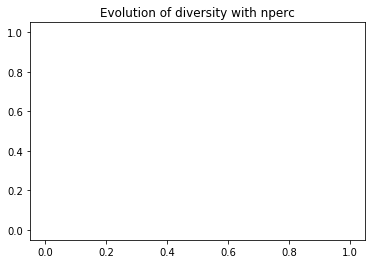

In [11]:
# <SOL>

def compute_diversity(nperc):
  acc_tree_train, acc_tree_test, Y_pred_train, Y_pred_test, outputs_train, outputs_both = BaggEnsemble(X_train, Y_train, X, Y, T=40, nperc=nperc, only_need_last=False)
  c = np.corrcoef(outputs_both)

  A = c.shape[0]
  B = c.shape[1]
  sum_c = 0.
  counter = 0
  for a in range(A):
    for b in range(a+1,B):
      sum_c += c[a,b]
      counter += 1

  diversity = 1 - (sum_c/counter)
  return diversity
  

nperc_range = np.arange(0.1,1,0.1)
diversity = []
for nperc in nperc_range:
  diversity.append(compute_diversity(nperc))

plt.figure()
plt.plot(nperc_range,diversity)
plt.title('Evolution of diversity with nperc')
plt.show()

# </SOL>


*We can see that diversity among trees in the ensemble decreases with nperc, that is, the relative amount of training data included for training of each of those trees. With low nperc, trees are trained with mostly different samples and so they yield more varied outputs. When nperc increases, more and more samples get to be "shared" by more trees during training, eventually leading (with high nperc) to very similar tree classifiers as they have been trained with mostly the same data.*

### Exercise 2.4

Compare the performace of the bagged ensemble trained in Exercise 2.1 with that of a Random Forest with the same number of learners, and using trees with a maximum depth of 2. Which differences are between both methods? 

Analyze the feature importances provided by the method RandomForestClassifier().


In [63]:
# <SOL>
from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier(n_estimators = 40, max_depth = 2)
RF.fit(X_train,Y_train)

acc_train = RF.score(X_train,Y_train)
acc_test = RF.score(X_test,Y_test)
print('Train accuracy is %.4f and test accuracy is %.4f' %(acc_train,acc_test))
# </SOL>

Train accuracy is 0.9780 and test accuracy is 0.9240


*A Bagging ensemble improves over tree classifiers by aggregating many of them, and training each of them with different data. This decreases the variability of the overall ensemble, with respect to single trees.*

*A Random Forest is an improvement of the Bagging ensemble by which not only the data gets subsampled, but also the features. Therefore, not always the same features will be used and the overall ensemble is more diverse and powerful. Selecting a subsample of features is the main difference between Bagging ensembles and Random Forest. By default, sqrt(n_features) is used.*

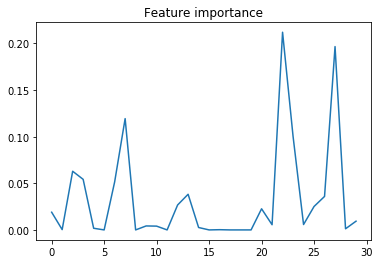

The five most relevant features are:
worst perimeter
worst concave points
mean concave points

Together they amount for 52.81 % of the feature importance



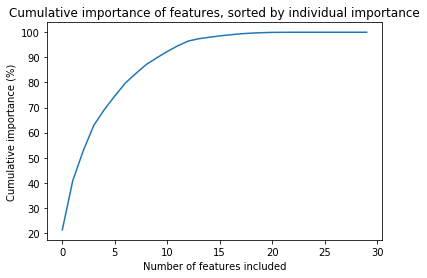

In [77]:
# <SOL>
plt.figure()
plt.plot(RF.feature_importances_), plt.title('Feature importance'), plt.show()
idx = np.argsort(RF.feature_importances_)
idx = idx[::-1] # reverse, to order higher to lower
print('The five most relevant features are:')
print(feature_names[idx[0]])
print(feature_names[idx[1]])
print(feature_names[idx[2]])
print('\nTogether they amount for %.2f %% of the feature importance\n' %(np.sum(RF.feature_importances_[idx[0:3]])*100))

cumulative_importance = []
for a in range(len(RF.feature_importances_)):
  cumulative_importance.append(np.sum(RF.feature_importances_[idx[0:a+1]])*100)

plt.figure()
plt.plot(cumulative_importance)
plt.title('Cumulative importance of features, sorted by individual importance')
plt.xlabel('Number of features included')
plt.ylabel('Cumulative importance (%)')
plt.show()
# </SOL>

*Additionally, Random Forest provides an estimate of which are the most relevant features, what may be very useful for feature selection.*

*In this case, we can see that the three most relevant features are prominent against all the others. In fact, together they already amount to 52.81% of the feature importance, and the other 27 features amount for the remaining 47.19%. Therefore, those three features would be a good starting point for any feature selection method, although it would need to incorporate more, as 52% importance is still low. Looking at the additive importance curve, it is clear that by selecting the 10 most prominent features we would be already using 90% of the importance, and by using 15 features, almost 100%. In this way, we could dispose of redudant or useless features.*

## Exercise 3.Boosting methods

### Exercise 3.1

Complete the following cell code to design a funtion able to train a boosting ensemble of $T$ decision trees. Again, fix the maximum depth of the tree to 2.



In [12]:
from sklearn.metrics import accuracy_score as acc

def RAEnsemble(X_train, Y_train, X_test, Y_test, T):
  '''
  Train and evaluate a bagged ensemble of decission trees

    Args:
        X_train(numpy dnarray): training (number training data x number dimensions). 
        Y_train (numpy dnarray): labels of the training data (number training data x 1).
        X_test(numpy dnarray): test data to evaluate the ensemble performance (number test data x number dimensions).
        Y_test (numpy dnarray): labels of the test data (number test data x 1).
        T: number of learners in the ensemble                                        
   Returns:
        acc_tree_train (numpy dnarray): accuracy over the training data for different number of learners. 
                It's a vector length T, where the t-th element is the ensemble accuracy when only t trees are used.
        acc_tree_test (numpy dnarray): accuracy over the test data for different number of learners. 
                It's a vector length T, where the t-th element is the ensemble accuracy when only t trees are used.
        Y_pred_train (numpy dnarray): predicted outputs over the training data. It's a matrix of dimensions T x number of training samples, 
          where the t-th row has the predicted outputs when t trees are used.
        Y_pred_test (numpy dnarray): predicted outputs over the test data. It's a matrix of dimensions T x number of test samples, 
          where the t-th row has the predicted outputs when t trees are used.
        alpha (numpy dnarray): weight vector of length T with the ouput weights assigned to combine the learner's outputs.
        Dt_all (numpy dnarray): emphasis function used to train each learner. It's a matrix of dimensions T x number of training samples, 
          where the t-th row has the emphasis function used by the t-th learner.

  '''  
  # <SOL>
  acc_tree_train = np.zeros((T,))
  acc_tree_test = np.zeros((T,))

  Y_pred_train = np.zeros((T,Y_train.shape[0]))
  Y_pred_test  = np.zeros((T,Y_test.shape[0]))

  alpha = np.zeros((T,1))
  Dt_all = np.zeros((T,X_train.shape[0]))

  outputs_train = np.zeros((T,Y_train.shape[0]))
  outputs_test  = np.zeros((T,Y_test.shape[0]))

  f_train = np.zeros((T,Y_train.shape[0]))
  f_test  = np.zeros((T,Y_test.shape[0]))

  indiv_train_acc = np.zeros((T,))

  Dt_all[0,:] = np.ones((1,X_train.shape[0])) / X_train.shape[0]  # Initialize all weights as 1 / n_samples
  for i in range(T):
    mytree = tree.DecisionTreeClassifier(max_depth=2)
    mytree.fit(X_train,Y_train,sample_weight=Dt_all[i,:])

    # # For discrete predictions
    # outputs_train[i,:] = mytree.predict(X_train)   
    # outputs_test[i,:]  = mytree.predict(X_test)

    # For real-valued predictions:
    outputs_train[i,:] = np.dot(mytree.predict_proba(X_train),mytree.classes_)
    outputs_test[i,:]  = np.dot(mytree.predict_proba(X_test) ,mytree.classes_)

    # Get individual tree accuracy
    tree_pred_train = copy.deepcopy(outputs_train[i,:])
    tree_pred_train[tree_pred_train>=0] = 1
    tree_pred_train[tree_pred_train <0] = -1
    indiv_train_acc[i] = acc(Y_train,tree_pred_train)  

    # Get gamma and alpha_i values
    gamma = np.dot(Dt_all[i,:],np.multiply(outputs_train[i,:],Y_train))
    alpha[i] = 0.5 * np.log((1+gamma)/(1-gamma))

    # Update emphasis function (except if in the last iteration)
    if (i < T-1):
      emphasis = np.multiply(Dt_all[i,:],np.exp(-1*alpha[i]*np.multiply(outputs_train[i,:],Y_train)))
      Dt_all[i+1,:] = emphasis / np.sum(emphasis) # normalize

    # Now let's obtain the f values (outputs of each tree * alphas)
    f_train[i,:] = np.sum(np.multiply(outputs_train[0:i+1,:],alpha[0:i+1]) , axis=0) #/ np.sum(alpha[0:i+1])
    f_test[i,:]  = np.sum(np.multiply(outputs_test[0:i+1,:],alpha[0:i+1])  , axis=0) #/ np.sum(alpha[0:i+1])

    # Depending on whether f_i is greater or smaller than 0, set the label to +1 or -1
    predicted_labels_train = copy.deepcopy(f_train[i,:])
    predicted_labels_train[predicted_labels_train >=0] = 1
    predicted_labels_train[predicted_labels_train < 0] = -1
    Y_pred_train[i,:] = predicted_labels_train
    acc_tree_train[i] = acc(Y_train,Y_pred_train[i,:])

    predicted_labels_test = copy.deepcopy(f_test[i,:])
    predicted_labels_test[predicted_labels_test >=0] = 1
    predicted_labels_test[predicted_labels_test < 0] = -1
    Y_pred_test[i,:] = predicted_labels_test
    acc_tree_test[i] = acc(Y_test,Y_pred_test[i,:])


  # </SOL>
  return Y_pred_train, Y_pred_test, acc_tree_train, acc_tree_test,  alpha, Dt_all, indiv_train_acc, f_train, f_test

### Exercise 3.2

Train a Real Adaboost ensemble of 40 trees and analyze the accuracy results over train and test data. Discuss the results. 

Remember that RA learners' output have to provide outputs between $[-1,1]$, so convert the data labels to values $-1$ and $1$ to make this work.

In [13]:
# Change labels 0 to 1
Y_train[Y_train==0] = -1
Y_test[Y_test==0] = -1

In [14]:
 # <SOL>
 T = 40
 Y_pred_train, Y_pred_test, acc_tree_train, acc_tree_test,  alpha, Dt_all, indiv_train_acc, f_train, f_test = RAEnsemble(X_train, Y_train, X_test, Y_test, T)

 from sklearn.metrics import confusion_matrix
 c = confusion_matrix(Y_test,Y_pred_test[-1,:])
 print(c)

 # </SOL>

[[ 73   6]
 [  3 146]]


*We can see that the accuracy of the Real Adaboost ensemble is good: 219 correct vs 9 incorrect (i.e. 96% accuracy, see accuracy graph below) over the test set. This result is better than the Bagging ensemble (92% accuracy over test set) as this methods places more emphasis on those data samples that are difficult to correctly classify.*

*In order to elaborate on the performance of the method, check the following plots. The respective comments are below them.*

### Exercise 3.3. 
Finally,  plot the evolution of the emphasis function and the alpha values. Analyze the results.

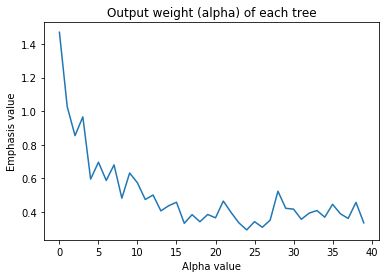

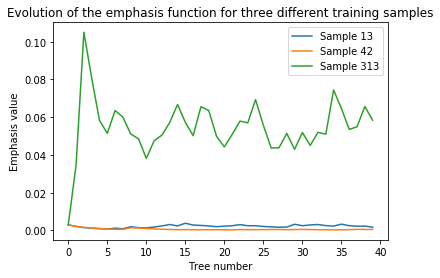

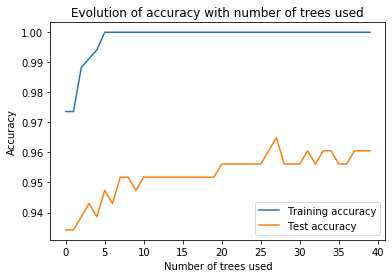

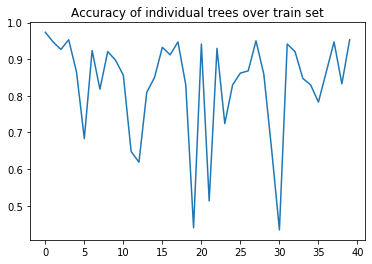

In [15]:
 # <SOL>
 plt.figure()
 plt.plot(alpha)
 plt.title('Output weight (alpha) of each tree')
 plt.xlabel('Alpha value')
 plt.ylabel('Emphasis value')
 plt.show()

 # Emphasis function for a few random points
 plt.figure()
 plt.plot(Dt_all[:,13],label='Sample 13')
 plt.plot(Dt_all[:,42],label='Sample 42')
 plt.plot(Dt_all[:,313],label='Sample 313')
 plt.legend()
 plt.xlabel('Tree number')
 plt.ylabel('Emphasis value')
 plt.title('Evolution of the emphasis function for three different training samples')
 plt.show()

 # Evolution of accuracy with the number of trees used
 plt.figure()
 plt.plot(acc_tree_train,label='Training accuracy')
 plt.plot(acc_tree_test,label='Test accuracy')
 plt.title('Evolution of accuracy with number of trees used')
 plt.xlabel('Number of trees used')
 plt.ylabel('Accuracy')
 plt.legend()
 plt.show()

 # Show the individual accuracy of all trees
 plt.figure()
 plt.plot(indiv_train_acc)
 plt.title('Accuracy of individual trees over train set')
 plt.show()


 # </SOL>

*In the first plot, we can see how different trees have different alphas, that is, different weight when deciding the output of the ensemble. A large alpha means that that tree is able to correctly classify samples with large emphasis (or many samples with normal emphasis, at the beginning).*

*In the second plot, we can see that some samples (for example, sample 42 in orange) are correctly classified from the very beginning and their emphasis (weight) quickly tends to zero. Others may take a few more trees (sample 13, in blue). And others, such as sample 313, in green, are wrongly classified so their emphasis greatly increases until they are correctly classified. Then, their emphasis decreases. If they start to be misclassified again, then their emphasis increases again, and so on.*

*In the third plot, we can see that the accuracy of the ensemble (not of the individual trees) increases with the number of trees used. With just T = 5, the ensemble is able to correctly predict all training samples. Of course, this does not mean that the 5th tree is able to do so, it is just as an ensemble when it is able to perform so well. Actually, in order to check that, an additional outoput variable has been introduced,* indiv_train_acc *, which contains the accuracy of the individual trees over the train set. It is displayed in the fourth plot, and it can be seen that each tree has a different accuracy, and in no case a single tree reaches accuracy 1. This is only achieved when using the ensemble.*

*We can see that the performance of the method is good, achieving 96% accuracy for the test set.*

### Scikit RealAdaBoost method


In [86]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=2), n_estimators=40)
classifier.fit(X_train,Y_train)
train_acc = classifier.score(X_train,Y_train)
test_acc = classifier.score(X_test,Y_test)
print('The accuracy of the Scikit Learn AdaBoost classifier over the training set is %.4f and over the test set is %.4f' %(train_acc,test_acc))

The accuracy of the Scikit Learn AdaBoost classifier over the training set is 1.0000 and over the test set is 0.9240


*The Scikit method has been also included for comparison. It performs similarly to our manually-implemented method, and in fact slightly worse in this case.*

# 5. Bias and variance trade-off

Consider that the real model behind our dasaset is given by:

$$Y = f(X) + \epsilon$$

so an observation $x$ is generated from the r.v.  $X$ and, then, it is transformed by a function $f(\cdot)$ and contaminated by an additive gaussian noise $\epsilon$ of zero mean and variance $\sigma_{\epsilon}^2$, to finally generate the target or label value $y$.

When a classifier or estimator is designed from a set of observations and labels, we design a function $\hat{f}(\cdot)$ trying to approximate as well as possible the original funtion $f(\cdot)$. In this case, **the expected squared prediction error** is:

$$ \mathbb{E} \left[ \left(Y−\hat{f}(X)\right)^2\right] = \mathbb{E} \left[ \left({f}(X) + \epsilon −\hat{f}(X)\right)^2\right] =  \left(\mathbb{E} \left[ {f}(X) \right]−\mathbb{E} \left[\hat{f}(X)\right]\right)^2 + \mathbb{E} \left[ \left(\hat{f}(X) − \mathbb{E}\left[ \hat{f}(X)\right]\right)^2\right] +  \sigma_{\epsilon}^2$$

Thus, this error can be decomposed into:
* A squared **bias** term ($\left(\mathbb{E} \left[ {f}(X) \right]−\mathbb{E} \left[\hat{f}(X)\right]\right)^2$): This terms represents the expected  difference between the prediction of the designed model and the value given by the real model. 
* A **variance** term ($\mathbb{E} \left[ \left(\hat{f}(X) − \mathbb{E}\left[ \hat{f}(X)\right]\right)^2\right]$): This term measures the variability of a model prediction.
* The **noise** term. This is the noise term presenting in the generation data model.

Usually, we have a single dataset and we train a unique model, so talking about expected or average prediction values might sounds quite strange. However, to undertand what these expectations are representing, consider that we can generate different training data sets from the distribution of $X$ and, for each data set, we can create a new model. Due to randomness in the underlying data sets, the resulting models will have a range of predictions. So, the bias term measures how far these models' predictions are from the correct value; whereas, the variance measures these predictions (for a given sample) vary between different realizations of the model.



<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Ensembles/Bias_Var.png" width="40%" > 



These  error terms are related to complexity of the model and to the concepts of under-fitting and over-fitting that we reviewed in the previous notebooks:
* Imagine that we have a **complex model**, able to be adjusted to the training data. In this case, different runs of the training data will generate quite different models, presenting a high variability or **high-variance** among them. These models usually present a high risk of **overfitting** and a bad generalizaztion capability.
* Now consider a **simpler model**, that don't tend to overfit, but may **underfit** their training data since it is not able to capture data distribution. Different realizations of this model will present similar predictions, but all of them will be far from the real value to be predicted, presenting a **high bias**.

In an ideal scenario, we would have infinite data to learn our model and we should be able to reduce both the bias and variance terms to 0. However, in a real world, there is a tradeoff between minimizing the bias and minimizing the variance and we can control this with the model complexity. As we increase the model complexity (more parameters are added), we can get to reduce the bias, but the variance is increased.


<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Ensembles/Bias_Var_ModelComplexity.png" width="40%" > 





Check the next cell code where the bias and variance term are computed for a decission tree classifier.

Note that, in this example, we are modeling a noise free problem ($\sigma_{\epsilon}^2=0$). That is, we are considering $Y = f(X)$.


The squared Bias term is:  [0.16723796 0.11135888 0.07884991 0.06443445 0.05359297 0.05061582
 0.05286257 0.04856801 0.05418278]
The Variance term is:  [0.1720239  0.13946714 0.13485835 0.13437047 0.1366355  0.13982355
 0.14221652 0.14433181 0.14623902]
The MSE is:  [0.33926186 0.25082601 0.21370826 0.19880492 0.19022847 0.19043937
 0.19507909 0.19289982 0.20042179]
We can check that MSE = Bias^2 + Variance


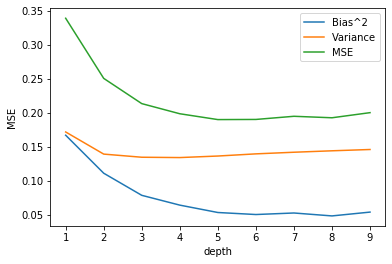

In [24]:
nperc=0.4
niter=100

# Use all data together (we don not nedd test data anymore)
X = np.vstack((X_train,X_test))
Y = np.hstack((Y_train,Y_test))

N = X.shape[0]
Nsub = np.int(nperc*N)

all_f_pred = np.zeros((niter,N))

rang_depth =  np.arange(1,10)

Bias2 = np.zeros((rang_depth.shape[0],N))
Var = np.zeros((rang_depth.shape[0],N))
MSE = np.zeros((rang_depth.shape[0],N))

for d, depth in enumerate(rang_depth):

  clf_tree = tree.DecisionTreeClassifier(max_depth=depth) 
  for i in range(niter):
    # Select some random samples
    samplesid = np.random.choice(N, Nsub, replace=False)
    X_train_sub  = X[samplesid,:]
    Y_train_sub  = Y[samplesid]

    # Train a tree with randomized dataset
    clf_tree.fit(X_train_sub, Y_train_sub)

    # Compute predicted output (overall available data)
    f_pred = clf_tree.predict(X)
    all_f_pred[i,:] = f_pred

  # Mean value of the predicted outputs for each data
  avg_f = np.mean(all_f_pred,axis =0)

  # Obtain the bias^2 of each data
  Bias2[d, :] = (Y - avg_f)**2
  # Obtain the var of each data
  Var[d, :] = np.mean((all_f_pred - avg_f)**2,axis=0)
  # Obtain MSE
  MSE[d,:] = np.mean((Y-all_f_pred)**2,axis=0)


# Print the results averaged over all data
Bias2mean = np.mean(Bias2,axis=1)
Varmean = np.mean(Var,axis=1)
MSEmean = np.mean(MSE,axis=1)

print("The squared Bias term is: ", Bias2mean)
print("The Variance term is: ",Varmean)
print("The MSE is: ",MSEmean)
print("We can check that MSE = Bias^2 + Variance")

plt.figure()
plt.plot(rang_depth, Bias2mean, label='Bias^2')
plt.plot(rang_depth, Varmean, label='Variance')
plt.plot(rang_depth, MSEmean, label='MSE')


plt.legend()
plt.xlabel('depth')
plt.ylabel('MSE')

plt.show()

## Exercise 4. Advanced work: Bias and variance trade off for ensemble methods

Analyze the bias and variance terms evolution with the number of base learners in:
* the bagged ensemble designed in exercise 2.1. 
* the RA ensemble designed in exercise 3.1.




### Bias and variance for the Bagging method (2.1.)
Generate 100 random partitions of training data and you can run the ensemble with up to 20 learners. Analyze and discuss the results. 


In [34]:
 # <SOL>

niter=100
nperc = 0.4
rangeT = np.arange(20)+1
N = Y.shape[0]

all_f_pred = np.zeros((niter,N))
Bias2 = np.zeros((len(rangeT),N))
Var = np.zeros((len(rangeT),N))
MSE = np.zeros((len(rangeT),N))

# Data partition and random selection is already done in the BaggEnsemble function
for a,T in enumerate(rangeT):
  for i in range(niter):
    _, _, _, Y_predictions, _, _ = BaggEnsemble(X,Y, X,Y, T, nperc, only_need_last=True) # It only returns the results with all learners
    all_f_pred[i,:] = Y_predictions[-1,:] # The last row contains the information for all learners
  # Mean value of the predicted outputs for each data
  avg_f = np.mean(all_f_pred, axis =0)
  # Obtain the bias^2 of each data
  Bias2[a, :] = (Y - avg_f)**2
  # Obtain the var of each data
  Var[a, :] = np.mean((all_f_pred - avg_f)**2,axis=0)
  # Obtain MSE
  MSE[a,:] = np.mean((Y-all_f_pred)**2,axis=0)
  print('T = %d finished' %T)

# Print the results averaged over all data
Bias2mean = np.mean(Bias2,axis=1)
Varmean = np.mean(Var,axis=1)
MSEmean = np.mean(MSE,axis=1)

 # </SOL>

T = 1 finished
T = 2 finished
T = 3 finished
T = 4 finished
T = 5 finished
T = 6 finished
T = 7 finished
T = 8 finished
T = 9 finished
T = 10 finished
T = 11 finished
T = 12 finished
T = 13 finished
T = 14 finished
T = 15 finished
T = 16 finished
T = 17 finished
T = 18 finished
T = 19 finished
T = 20 finished


The squared Bias term is:  [0.1117884  0.14220316 0.10478664 0.11918313 0.1090587  0.11977153
 0.10810756 0.11176591 0.11086749 0.11736028 0.11240351 0.11518313
 0.11632478 0.11843866 0.11478946 0.11891388 0.11359508 0.1198826
 0.11612373 0.11843937]
The Variance term is:  [0.15429244 0.12422917 0.09324499 0.08327733 0.07090615 0.07108963
 0.06250756 0.06109877 0.05426432 0.05437961 0.04829947 0.05001898
 0.04142566 0.04641195 0.04282039 0.0422812  0.03958594 0.0400471
 0.03783058 0.03734271]
The MSE is:  [0.26608084 0.26643234 0.19803163 0.20246046 0.17996485 0.19086116
 0.17061511 0.17286467 0.16513181 0.17173989 0.16070299 0.16520211
 0.15775044 0.16485062 0.15760984 0.16119508 0.15318102 0.1599297
 0.15395431 0.15578207]
We can check that MSE = Bias^2 + Variance


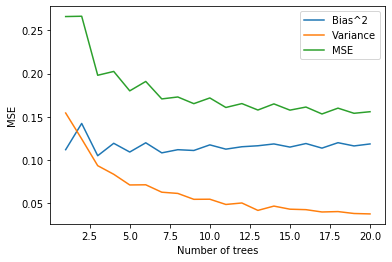

In [35]:
 # <SOL>
print("The squared Bias term is: ", Bias2mean)
print("The Variance term is: ",Varmean)
print("The MSE is: ",MSEmean)
print("We can check that MSE = Bias^2 + Variance")

plt.figure()
plt.plot(rangeT, Bias2mean, label='Bias^2')
plt.plot(rangeT, Varmean, label='Variance')
plt.plot(rangeT, MSEmean, label='MSE')


plt.legend()
plt.xlabel('Number of trees')
plt.ylabel('MSE')
plt.show()
 # </SOL>

*As we use more trees in the Bagging method, the overall variance decreases. This is quite logical: each individual tree can be quite diverse and produce somehow different outputs, depending in the data selected for training. Nevertheless, when we gather enough trees in an ensemble, chances are that their average output is going to be similar. Therefore, increasing the number of trees in the ensemble decreases variance.*

*However, bias is not decreasing. This is due to the Baggings method not really improving the classification capabilities of any of the trees (as Adaboost does by means of the emphasis function), but simply training a number of different classifiers over different training sets and use a majority vote system to prevent overfitting and a more homogeneous result, no so depending on the training data, and therefore more likely to generalize well. Therefore, it makes sense that variance decreases as the number of trees increases, but bias does not decrease, as in fact, we are not really increasing the complexity of the model.*

### Bias and variance for Adaboost method (3.1.)
Run the ensemble with up to 20 learners, and analyze the results.

Note: we should use train and test subsets separately, and evaluate bias and variance over the test set. Before this was not done as the Bagging method uses a subset of data to train each 

In [32]:
# <SOL>

niter=100
nperc = 0.4
rangeT = np.arange(20) + 1
N = Y.shape[0]

all_f_pred = np.zeros((niter,N))
Bias2 = np.zeros((len(rangeT),N))
Var = np.zeros((len(rangeT),N))
MSE = np.zeros((len(rangeT),N))

# Data partition and random selection is already done in the BaggEnsemble function
for a, T in enumerate(rangeT):
  for i in range(niter):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=(1-nperc))
    _, Y_predictions_test, _, _, _, _, _, _, _ = RAEnsemble(X_train, Y_train, X, Y, T)
    all_f_pred[i,:] = Y_predictions_test[-1,:] # The last row contains the information for all learners
  # Mean value of the predicted outputs for each data
  avg_f = np.mean(all_f_pred, axis =0)
  # Obtain the bias^2 of each data

  Bias2[a, :] = (Y - avg_f)**2
  # Obtain the var of each data
  Var[a, :] = np.mean((all_f_pred - avg_f)**2,axis=0)
  # Obtain MSE
  MSE[a,:] = np.mean((Y-all_f_pred)**2,axis=0)
  print('T = %d finished' %T)

# Print the results averaged over all data
Bias2mean = np.mean(Bias2,axis=1)
Varmean = np.mean(Var,axis=1)
MSEmean = np.mean(MSE,axis=1)

 # </SOL>

T = 1 finished
T = 2 finished
T = 3 finished
T = 4 finished
T = 5 finished
T = 6 finished
T = 7 finished
T = 8 finished
T = 9 finished
T = 10 finished
T = 11 finished
T = 12 finished
T = 13 finished
T = 14 finished
T = 15 finished
T = 16 finished
T = 17 finished
T = 18 finished
T = 19 finished
T = 20 finished


The squared Bias term is:  [0.10867346 0.10534833 0.06684218 0.05715009 0.05432619 0.04311353
 0.04515852 0.04099051 0.04015185 0.03934903 0.0369181  0.03935888
 0.03768717 0.03576801 0.03884429 0.03783902 0.03815606 0.03836134
 0.03699684 0.03766327]
The Variance term is:  [0.14665167 0.11735817 0.1112246  0.097929   0.09590228 0.08883726
 0.08911213 0.08477399 0.08216801 0.08029947 0.08230861 0.08085202
 0.0781652  0.07699121 0.07897645 0.08251248 0.07720422 0.07432759
 0.07857434 0.07439297]
The MSE is:  [0.25532513 0.2227065  0.17806678 0.15507909 0.15022847 0.13195079
 0.13427065 0.1257645  0.12231986 0.11964851 0.11922671 0.1202109
 0.11585237 0.11275923 0.11782074 0.12035149 0.11536028 0.11268893
 0.11557118 0.11205624]
We can check that MSE = Bias^2 + Variance


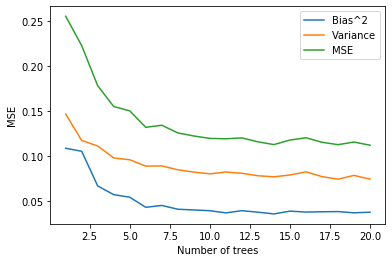

In [33]:
 # <SOL>
print("The squared Bias term is: ", Bias2mean)
print("The Variance term is: ",Varmean)
print("The MSE is: ",MSEmean)
print("We can check that MSE = Bias^2 + Variance")

plt.figure()
plt.plot(rangeT, Bias2mean, label='Bias^2')
plt.plot(rangeT, Varmean, label='Variance')
plt.plot(rangeT, MSEmean, label='MSE')


plt.legend()
plt.xlabel('Number of trees')
plt.ylabel('MSE')
plt.show()
 # </SOL>

*When having a moderate to high number of trees (>5), both variance and bias are greatly reduced, to a total MSE around 0.11 (lower than Baggings method). However, when the Adaboost method has just a few trees (less than 5), it does not have the opportunity to increase enough the emphasis on difficult samples and some of them still get misclasssified using all trees, so the bias is larger. And also depends more on which of those samples are included in the training data, so the variance is also higher.*

*Then, when increasing the number of trees included, the bias decreases as accuracy of the ensemble increases, learning to classify difficult samples. This also makes the ensemble less dependent on which samples are included in the training set, so variance also decreases.*

# Conclusions
*To sum up, ensemble methods enable to use weak classifiers, such that tree classifiers of small depth, in order to get more robust classifiers.*

* *Bagging ensembles reduce the variability of tree classifiers with respect to their training data by training many different trees over training data subsets, therefore reducing variability and also improving the generalization capabilities.*
* *Random Forest elaborates over the Bagging ensemble concept, not only selecting data subsets, but also selecting only a limited number of features. This makes trees depends less on specific features and produce more diverse outputs, therefore making the ensemble more robust.*
* *Adaboost ensemble focus in giving more importance to correctly classifying difficult samples. Therefore, it is able to achieve perfect performance over the training set, and moreover, also improves its performance over the test set. Therefore, by placing more emphasis on less frequent samples that are usually more difficult to classify, the ensemble is able to also improve its generalization capabilities.*